In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import thinkstats2
import thinkplot

In [2]:
saffronart_df = pd.read_csv('saffronart_dataset.csv') 

# change the dates to Pandas datetime objects:
saffronart_df['auction_date'] = pd.to_datetime(saffronart_df['auction_date'])
saffronart_df['birth_date'] = pd.to_datetime(saffronart_df['auction_date'])
saffronart_df['death_date'] = pd.to_datetime(saffronart_df['auction_date'])

saffronart_df.head(5)

,artist,birth_date,birth_place,death_date,artist_age,title,winning_bid,low_est,high_est,auction_date,category,style,size,medium
0,akhilesh,2019-06-01,Indore,2019-06-01,63.0,Divine Conversation,9000.0,5000.0,7000.0,2019-06-01,painting,abstract,71.5 x 71.5 in,acrylic on canvas
1,akhilesh,2013-11-01,Indore,2013-11-01,63.0,In search of Untitled forms -II,1120.0,5000.0,6670.0,2013-11-01,painting,abstract,32.5 x 44 in,acrylic on canvas
2,akhilesh,2013-08-01,Indore,2013-08-01,63.0,In Search of Untitled Lines,6186.0,6900.0,8625.0,2013-08-01,painting,NaN,47 x 47 in,acrylic on canvas
3,akhilesh,2013-02-01,Indore,2013-02-01,63.0,Magadhi,2400.0,5770.0,7695.0,2013-02-01,painting,abstract,33 x 44.5 in,acrylic on canvas
4,akhilesh,2013-02-01,Indore,2013-02-01,63.0,Untitled,2942.0,6735.0,8655.0,2013-02-01,painting,abstract,40 x 40 in,acrylic on canvas


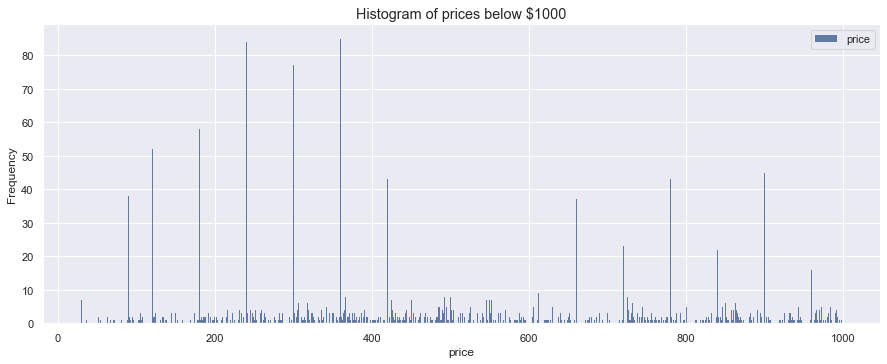

<Figure size 576x432 with 0 Axes>

In [3]:
# Histogram of prices below $1000

low_price = saffronart_df[saffronart_df.winning_bid < 1000]
low_price_hist = thinkstats2.Hist(low_price.winning_bid, label='price')

plt.figure(figsize = (15, 5.5))
plt.title('Histogram of prices below $1000', fontsize = 'x-large')

thinkplot.Hist(low_price_hist)
thinkplot.Show(xlabel='price', ylabel='Frequency')

#### Comment:
The histogram above shows the distribution of prices below $1000. We can see that even within such a small interval, there're still so many random noises. Histogram, therefore, is not a good way of showing the overall distribution.

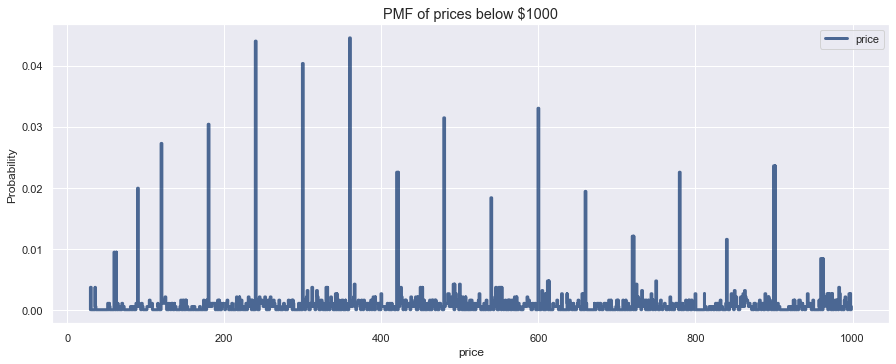

<Figure size 576x432 with 0 Axes>

In [4]:
# Probability Mass Function of prices below $1000:

low_price_pmf = thinkstats2.Pmf(low_price.winning_bid, label='price')

plt.figure(figsize = (15, 5.5))
plt.title("PMF of prices below $1000", fontsize = 'x-large')

thinkplot.Pmf(low_price_pmf)
thinkplot.Show(xlabel='price', ylabel='Probability') 

#### Comment:
Another way of representing distributions is the Probability Mass Function (PMF). The graph above shows the distribution of prices below $1000. Again, the problem of noises that we have with histogram shows up. This is because the only difference between a PMF and a histogram is that each value is mapped to its probability instead of its frequency. However, we may still want to graph the PMF of all the prices to have some impression of the distribution. 

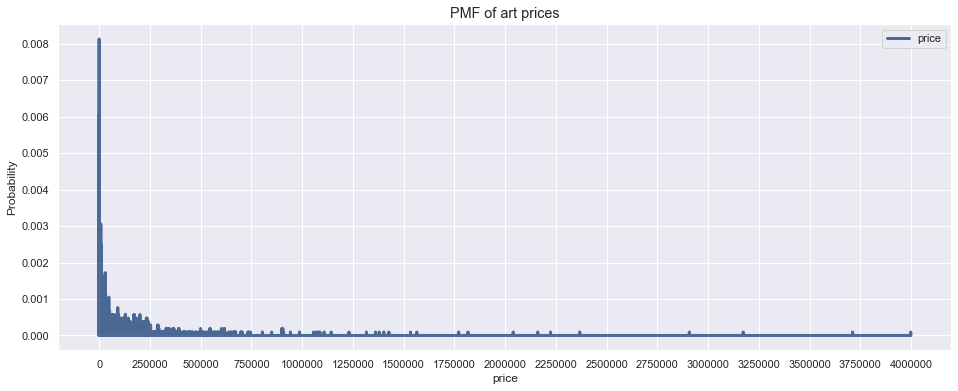

<Figure size 576x432 with 0 Axes>

In [5]:
# Probability Mass Function:
price_pmf = thinkstats2.Pmf(saffronart_df.winning_bid, label='price')

plt.figure(figsize = (16, 6))
plt.xticks([p for p in range(0, 4250000, 250000)])
plt.title("PMF of art prices", fontsize = 'x-large')

thinkplot.Pmf(price_pmf)
thinkplot.Show(xlabel='price', ylabel='Probability') 

#### Comment:
From the graph above, we see that the prices of most lots are below $250,000. Because there're a lot of values, the Probability Mass Function (PMF) is not a good way to represent the distribution. A better option is the Cumulative Distribution Function (CDF).

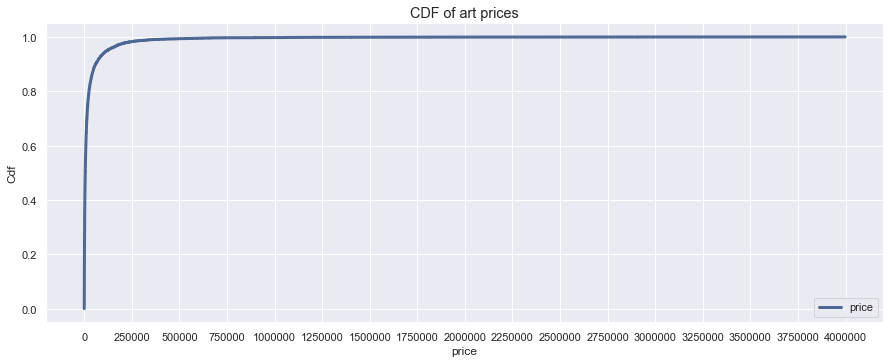

<Figure size 576x432 with 0 Axes>

In [6]:
# Cumulative Distribution Function:

price_cdf = thinkstats2.Cdf(saffronart_df.winning_bid, label='price')

plt.figure(figsize = (15, 5.5))
plt.xticks([p for p in range(0, 4250000, 250000)])
plt.title("CDF of art prices", fontsize = 'x-large')

thinkplot.Cdf(price_cdf)
thinkplot.Show(xlabel='price', ylabel='Cdf') 

#### Comment:
The CDF confirms our observation that most lots are priced less than $250,000. Because there're many values and the range is vast, it makes the distribution almost a continuous one. This is reflected in the smoothness of the CDF.  

Before trying to find an analytic equation for the CDF, we compute some summary statistics first.  

In [7]:
# Summary Statistics:

mean_price = saffronart_df.winning_bid.mean()
print('The mean price is: ${:.2f}\n'.format(mean_price))

price_std = saffronart_df.winning_bid.std()
print('The standard deviation of prices is: ${:.2f}\n'.format(price_std))

quartile_1 = saffronart_df.winning_bid.quantile(q=0.25)
print('The first quartile is: ${}\n'.format(quartile_1))

median_price = saffronart_df.winning_bid.median()
print('The median price is: ${}\n'.format(median_price))

quartile_3 = saffronart_df.winning_bid.quantile(q=0.75)
print('The third quartile is: ${}\n'.format(quartile_3))

IQR = quartile_3 - quartile_1
print('The interquartile range is: ${}\n'.format(IQR))

min_price = saffronart_df.winning_bid.min()
print('The lowest price is: ${}\n'.format(min_price))

max_price = saffronart_df.winning_bid.max()
print('The highest price is: ${}'.format(max_price))

The mean price is: $28881.16

The standard deviation of prices is: $115183.62

The first quartile is: $1440.0

The median price is: $5160.0

The third quartile is: $18121.0

The interquartile range is: $16681.0

The lowest price is: $30.0

The highest price is: $3998000.0


#### Comment:
It can be observed that the mean price is significantly greater than the median. This suggests that the distribution is skewed to the right. This effect is due to the presence of outliers (extremely high prices). For example, the highest price is nearly 4 million dollars. Extremely high prices also have a strong effect on the spread of data. The standard deviation is $115,183, which is about 4 times greater than the mean. 

To present this visually, we graph the mean and the median on the CDF.

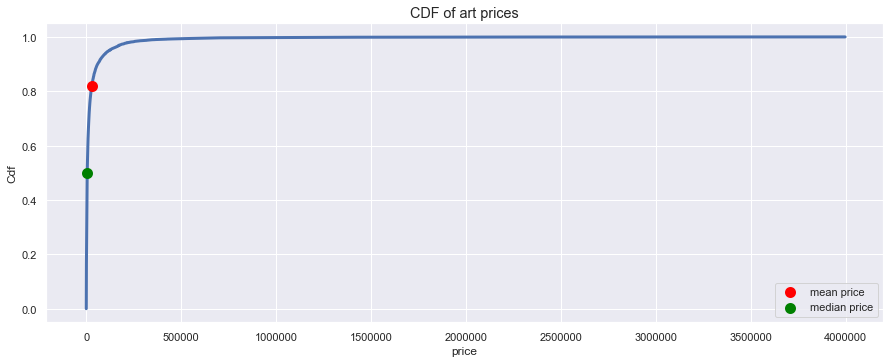

In [8]:
plt.figure(figsize = (15, 5.5))
plt.title("CDF of art prices", fontsize = 'x-large')

plt.plot(price_cdf.xs, price_cdf.ps, linewidth=3, zorder=1)
plt.scatter(mean_price, price_cdf.Prob(mean_price), color='red', label='mean price', zorder=2, linewidth=5)
plt.scatter(median_price, price_cdf.Prob(median_price), color='green', label='median price', zorder=2, linewidth=5)

plt.xlabel('price')
plt.ylabel('Cdf')

plt.legend()
plt.show()

#### Comment:
We see that the mean is greater than 80% of the prices. However, it's as nothing compared to the record price of $3,998,000. This is the price of the painting Kali by Tyeb Mehta.

From the shapes of the CDF and PMF, we suspect that it's a Pareto distribution. There is a simple visual test that indicates whether an empirical distribution fits a Pareto distribution: on a log-log scale, the CCDF (Complement CDF = 1 - CDF) looks like a straight line.

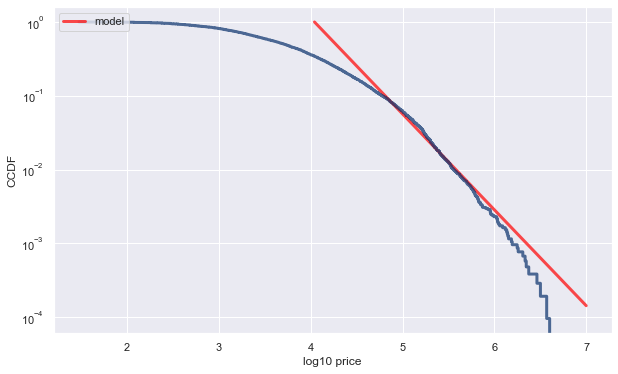

In [45]:
# Visual test for Pareto distribution:
plt.figure(figsize = (10, 6))

log_price = np.log10(saffronart_df.winning_bid)
cdf_log = thinkstats2.Cdf(log_price)

# pareto model plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=11000, alpha=1.3, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='red')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 price', ylabel='CCDF', yscale='log')

#### Comment:
I have provided an estimation of the line that best fits the price distribution. This line belongs to a Pareto distribution with the smallest possible value $x_m = 11,000$. This is certainly not true, and we can observe that the line only fits a part of the actual distribution. It can be concluded that the Pareto distribution is not a good model, especially at the two tails. A distribution with a similar CDF is the lognormal distribution. We apply the Normal Probability Plot to validate this speculation.

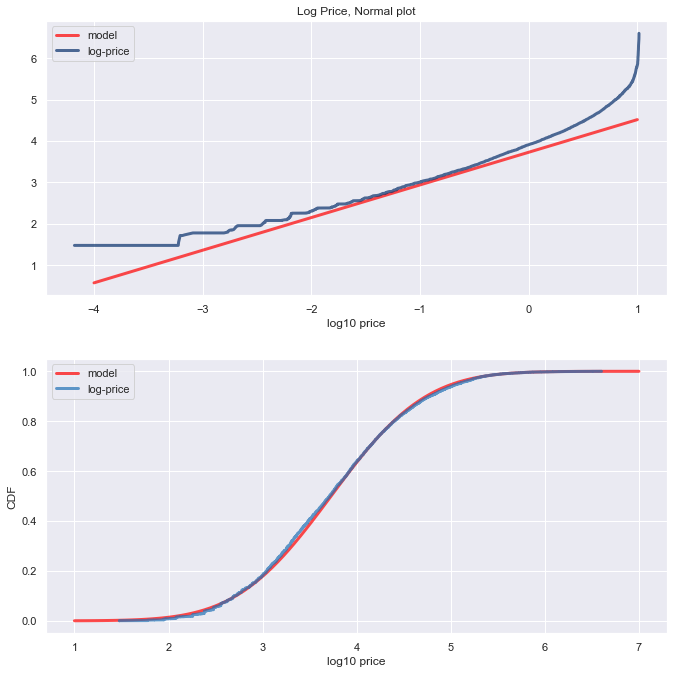

In [114]:
# try a lognormal distribution:

fig = plt.figure(figsize=(10,10))

###

plt.subplot(211)

xs = [-4, 1] 
fxs, fys = thinkstats2.FitLine(xs, inter=log_price.mean(), slope=log_price.std())
thinkplot.Plot(fxs, fys, color='red', label='model') 

xs, ys = thinkstats2.NormalProbability(log_price) 
thinkplot.Plot(xs, ys, label = 'log-price')
thinkplot.Config(title='Log Price, Normal plot', xlabel='log10 price')

plt.legend()

###

plt.subplot(212)

xs, ps = thinkstats2.RenderNormalCdf(log_price.mean(), log_price.std(), low=1, high=7)
thinkplot.Plot(xs, ps, label='model', color='red')

thinkplot.Cdf(cdf_log, label='log-price')
thinkplot.Config(xlabel='log10 price', ylabel='CDF')

plt.legend()

###

fig.tight_layout(pad=3.0)

plt.show()

#### Comment:
We see that the lognormal distribution is a better estimation, except for the right tail... strong effect of outliers... 

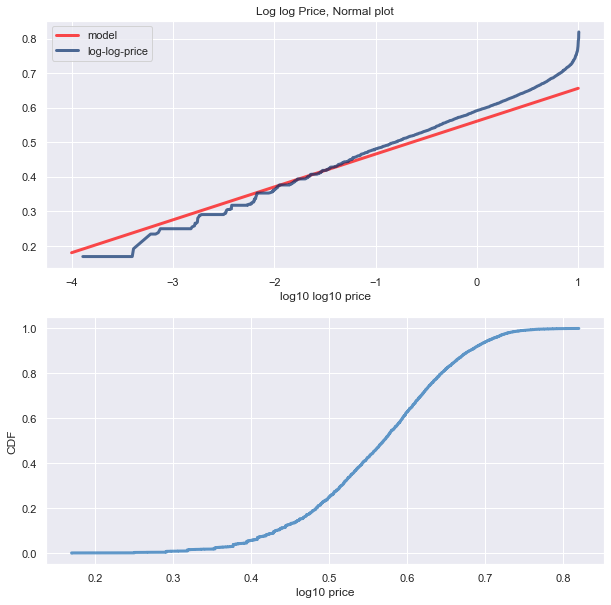

In [98]:
# try a log-lognormal distribution:

fig = plt.figure(figsize=(10,10))
log2_price = np.log10(log_price) 

###

plt.subplot(211)

xs = [-4, 1] 
fxs, fys = thinkstats2.FitLine(xs, inter=log2_price.mean(), slope=log2_price.std())
thinkplot.Plot(fxs, fys, color='red', label='model') 

xs, ys = thinkstats2.NormalProbability(log2_price) 
thinkplot.Plot(xs, ys, label = 'log-log-price')
thinkplot.Config(title='Log log Price, Normal plot', xlabel='log10 log10 price')

###

plt.subplot(212)

cdf_log2 = thinkstats2.Cdf(log2_price)

thinkplot.Cdf(cdf_log2)
thinkplot.Config(xlabel='log10 price', ylabel='CDF')

In [ ]:
# try a Weibull distribution:

***

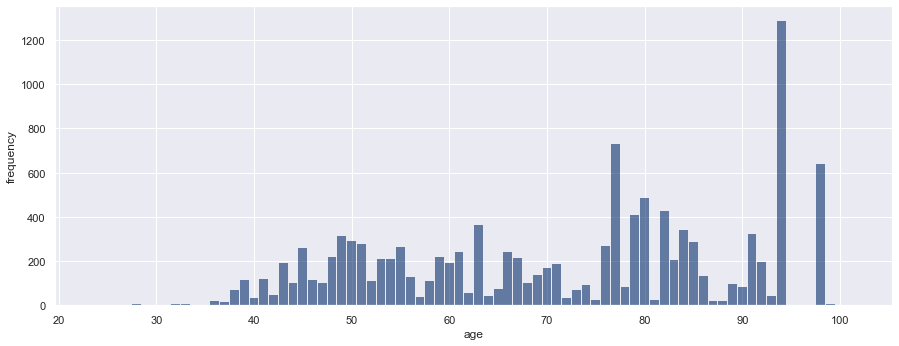

<Figure size 576x432 with 0 Axes>

In [11]:
age_hist = thinkstats2.Hist(saffronart_df.artist_age)

plt.figure(figsize = (15, 5.5))
thinkplot.Hist(age_hist)
thinkplot.Show(xlabel='age', ylabel='frequency') 

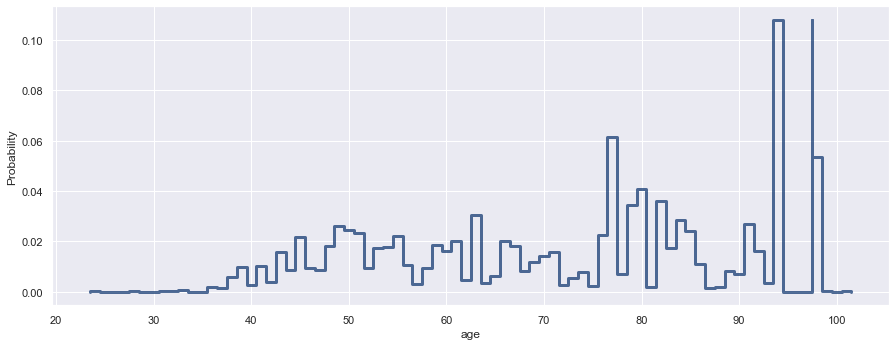

<Figure size 576x432 with 0 Axes>

In [12]:
age_pmf = thinkstats2.Pmf(saffronart_df.artist_age)

plt.figure(figsize = (15, 5.5))
thinkplot.Pmf(age_pmf)
thinkplot.Show(xlabel='age', ylabel='Probability') 